In [1]:
import sys

sys.path

sys.path.append("/Users/hbuhrmann/PycharmProjects/CycleStats")

In [2]:
import sourcetocsv as cycle
import numpy as np
import thinkstats2
import thinkplot

In [3]:
#filepath = 'C:/Users/hanne/PycharmProjects/CycleStats/PowerOutputExperiments/FinalFiles/'
filepath = '/users/hbuhrmann/PycharmProjects/CycleStats/PowerOutputExperiments/FinalFiles/'

filename= 'AllFields.csv'

cycledf=cycle.getfinalcsvcycledata(filepath,filename)

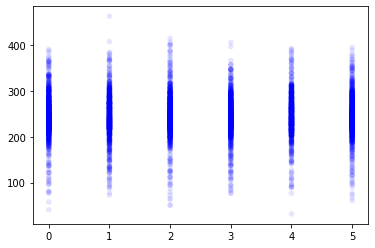

0 974 974
1 985 1959
2 994 2953
3 995 3948
4 985 4933
5 972 5905


<Figure size 576x432 with 0 Axes>

In [4]:
#Explore the relationnship between power and pedal position
'''
Determine the pedal position as follows :

Assume the pedal starts in position 0 (which we won't know where exactly this is)

The relative pedal position for the next datapoint can basically be calculated as the modulus of the total number of pedal
revolutions since the start of the session. 

'''
intervals = 6

cycledf['Revolutions']=cycledf.Cadence/60.0*cycledf.Duration/1000.0
cycledf['PedalPos']=np.int32(np.mod(cycledf.Revolutions.cumsum(),1)*intervals)

#cycledf.loc[cycledf['PedalPos'] >= 100] = 0

pedalposhist = thinkstats2.Hist(cycledf.PedalPos)

#Create a scatterplot of power vs. pedal position


tempdf=cycledf[cycledf.Watts > 0]


thinkplot.Scatter(xs=tempdf.PedalPos,ys=tempdf.Watts,alpha=0.1)
thinkplot.Show()
   
sum = 0    
for val,count in pedalposhist.SortedItems():
    sum+=count
    print (val,count,sum)
    

In [5]:
cycledf.head()

,Unnamed: 0,RowId,ActivityId,Time,LatitudeDegrees,LongitudeDegrees,DistanceMeters,AltitudeMeters,Heartrate,Cadence,...,RunEnd2,RunDistXY2,RunDistXYZ2,RunElevation2,RunAvgGradient2,RunDur2,RunAvgSpeed2,RunAvgCadence2,Revolutions,PedalPos
0,0,1,_20200101095923,2020-01-01 09:59:23,41.989384,2.243389,NaN,426.0,88.0,79.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0
1,1,2,_20200101095923,2020-01-01 09:59:24,41.989384,2.243389,NaN,426.0,92.0,80.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333333,1
2,2,3,_20200101095923,2020-01-01 09:59:25,41.989384,2.243389,NaN,426.0,94.0,80.0,...,False,0.000000,0.000000,0.0,NaN,2000.0,0.000000,80.0,1.333333,3
3,3,4,_20200101095923,2020-01-01 09:59:26,41.989469,2.243405,NaN,426.0,95.0,78.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.300000,5
4,4,5,_20200101095923,2020-01-01 09:59:27,41.989469,2.243405,NaN,426.0,96.0,74.0,...,False,9.543713,9.543713,0.0,0.0,4000.0,2.385928,78.0,1.233333,1


position = 0, num values = 204, standard deviation = 44.94744261405485 (18.0% of 244)
position = 1, num values = 211, standard deviation = 45.78992144426926 (19.0% of 243)
position = 2, num values = 209, standard deviation = 45.70780510255537 (19.0% of 245)
position = 3, num values = 194, standard deviation = 42.52143716254453 (18.0% of 241)
position = 4, num values = 203, standard deviation = 43.41321352013715 (18.0% of 245)
position = 5, num values = 207, standard deviation = 44.701770624497996 (18.0% of 243)
[209.0, 207.0, 210.0, 207.0, 211.0, 208.0]
[242.0, 242.0, 243.0, 240.0, 244.0, 242.0]
[287.0, 286.0, 286.0, 281.0, 286.0, 287.0]


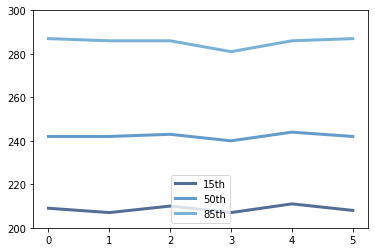

<Figure size 576x432 with 0 Axes>

In [6]:
#Create CDF's and determine percentiles for each pedal position
import pandas as pd

pedalposcdfs = []
pedalpospmfs = []
percs = [15,50,85]
xvalues = []

for i in range (0,intervals):
    xvalues.append(i)
    pedalposcdfs.append(thinkstats2.Cdf(tempdf.Watts[tempdf.PedalPos == i]))
    pedalpospmfs.append(thinkstats2.Pmf(tempdf.Watts[tempdf.PedalPos == i]))
    print (f'position = {i}, num values = {len(pedalposcdfs[i])}, standard deviation = {pedalpospmfs[i].Std()} ({round(pedalpospmfs[i].Std()/pedalpospmfs[i].Mean(),2)*100}% of {np.int32(pedalpospmfs[i].Mean())})')


for perc in percs:
    watts = [cdf.Percentile(perc) for cdf in pedalposcdfs]
    label = '%dth' % perc
    thinkplot.Plot(xvalues,watts,label=label)
    print (watts)

thinkplot.Config(ylim=(200,300))
thinkplot.Show()

# CONCLUSION

The data in the Wahoo Kickr files does not give any meaningful data around pedal positioning and power

The only reason why I thought it might is because the instantenous power measurement is so incredibly varied from one second to the next. 